In [1]:
import glob

In [ ]:
dat_failai = glob.glob('../../DATA/OOP_DATA/*.dat')

In [10]:
import pandas as pd
import glob

file_paths = glob.glob(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY0\REF*.dat")
if not file_paths:
    print("No files 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF*.dat'")
else:
    print(f"Files found: {file_paths}")

Files found: ['C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_1k_FW_2.08.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_2k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_3k_FW_2.03.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_4k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.07.dat']


In [11]:
import pandas as pd
import glob

file_paths = glob.glob(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY0\REF*.dat")
if not file_paths:
    print("No files 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF*.dat'")
else:
    print(f"Files found: {file_paths}")


def process_and_calculate_pce(file_path, input_power=1000):
    try:
        
        df = pd.read_csv(file_path, delimiter=r'\s*;\s*', engine='python')
        if df.empty:
            print(f"File {file_path} is empty or could not be read.")
            return None, None
        
        df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
        
        
        print(f"Data read from {file_path}:")
        print(df.head())

        
        min_power = df['P[mW/cm^2]'].min()

        
        pce = (min_power / input_power) * 100

        return min_power, pce
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None, None

results = []
for file_path in file_paths:
    min_power, pce = process_and_calculate_pce(file_path)
    if min_power is not None:
        results.append((file_path, min_power, pce))

results


Files found: ['C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_1k_FW_2.08.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_2k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_3k_FW_2.03.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_4k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.07.dat']
Data read from C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY0\REF_D_1k_FW_2.08.dat:
       U[V]      I[A]  j[mA/cm^2]  P[mW/cm^2]
0  1.200000  0.001286   21.434133   25.720960
1  1.176667  0.000809   13.480692   15.862281
2  1.153333  0.000465    7.750650    8.939083
3  1.130000  0.000187    3.112807    3.517472
4  1.106667  0.000008    0.135929    0.150428
Data 

[('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_1k_FW_2.08.dat',
  -14.9890787,
  -1.49890787),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_2k_FW_2.05.dat',
  -7.5438748,
  -0.75438748),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_3k_FW_2.03.dat',
  -7.4238104,
  -0.7423810399999999),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_4k_FW_2.05.dat',
  -8.0058633,
  -0.8005863299999999),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.05.dat',
  -5.8455224,
  -0.58455224),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.07.dat',
  -7.5898202,
  -0.7589820199999999)]

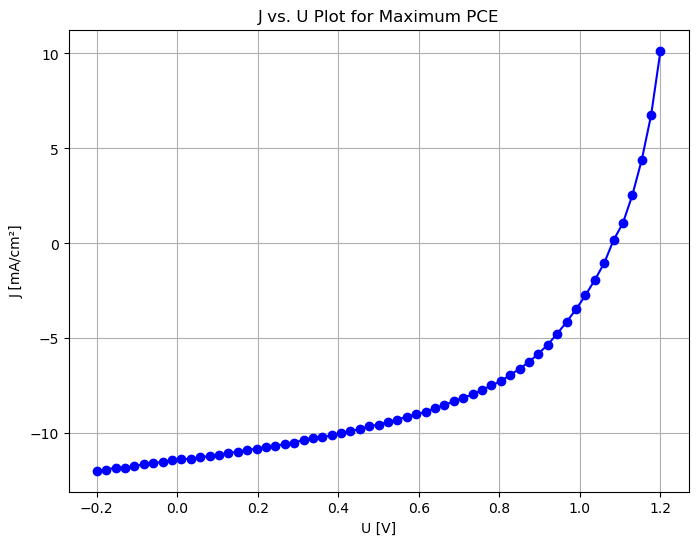

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


max_pce_entry = max(results, key=lambda x: x[2])  
max_pce_file_path = max_pce_entry[0]

df = pd.read_csv(max_pce_file_path, delimiter=r'\s*;\s*', engine='python')
df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']

plt.figure(figsize=(8, 6))
plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', color='b')
plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE')
plt.grid(True)
plt.show()


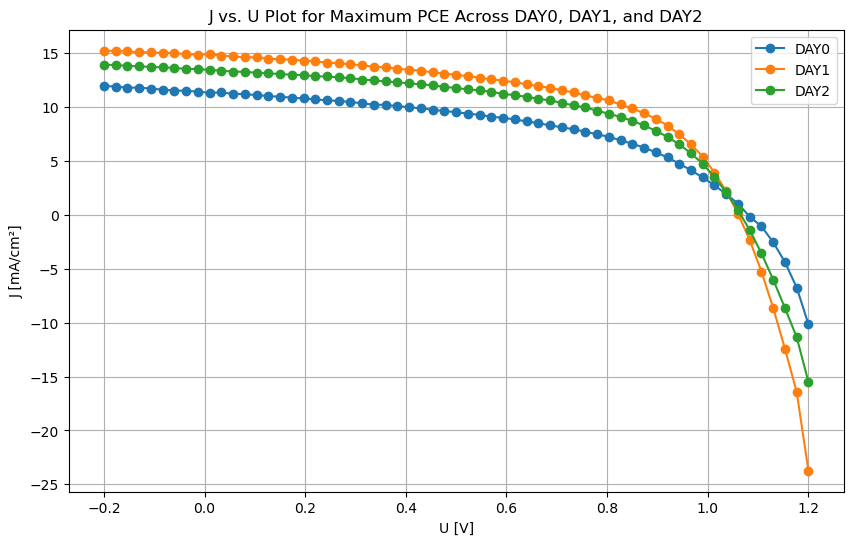

In [19]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

data_by_day = {}

for i in range(3):
    file_pattern = fr"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY{i}\REF*.dat"
    file_paths = glob.glob(file_pattern)
    
    max_pce = None
    max_pce_file = None
    
    for file_path in file_paths:
        try:
            
            df = pd.read_csv(file_path, delimiter=r'\s*;\s*', engine='python')
            df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
            
            
            min_power = df['P[mW/cm^2]'].min()
            pce = (min_power / 1000) * 100 
            
            
            if max_pce is None or pce > max_pce:
                max_pce = pce
                max_pce_file = file_path
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
    
    if max_pce_file:
        df = pd.read_csv(max_pce_file, delimiter=r'\s*;\s*', engine='python')
        df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
        df['j[mA/cm^2]'] *= -1
        data_by_day[f'DAY{i}'] = df

plt.figure(figsize=(10, 6))
for day, df in data_by_day.items():
    plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', label=day)

plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE Across DAY0, DAY1, and DAY2')
plt.legend()
plt.grid(True)
plt.show()


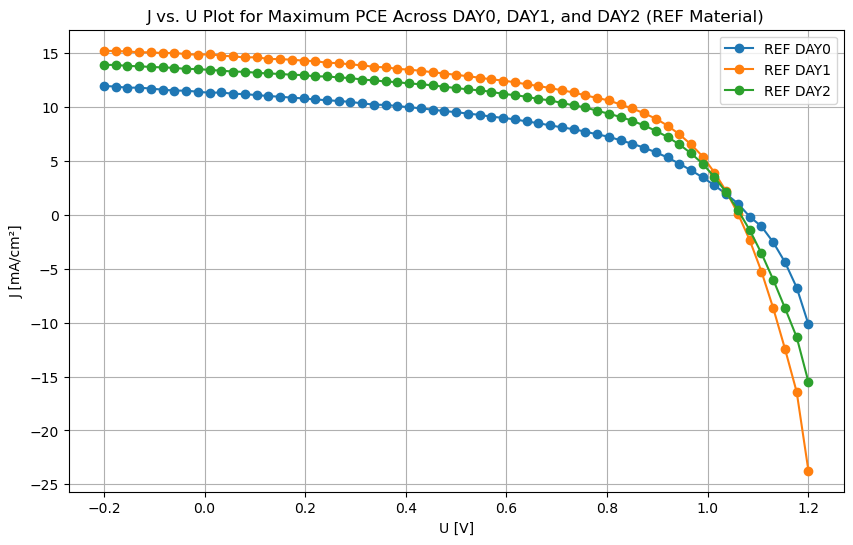

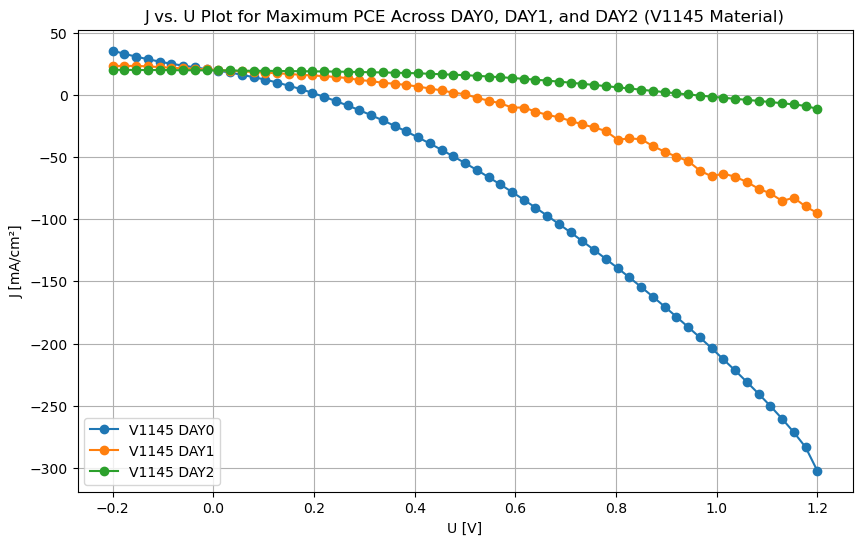

In [20]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

def process_material(material):
    data_by_day = {}


    for i in range(3):
        file_pattern = fr"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY{i}\{material}*.dat"
        file_paths = glob.glob(file_pattern)
        
        max_pce = None
        max_pce_file = None
        
        for file_path in file_paths:
            try:
                
                df = pd.read_csv(file_path, delimiter=r'\s*;\s*', engine='python')
                df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
                
                min_power = df['P[mW/cm^2]'].min()
                pce = (min_power / 1000) * 100
                
                
                if max_pce is None or pce > max_pce:
                    max_pce = pce
                    max_pce_file = file_path
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")
        
        if max_pce_file:
            df = pd.read_csv(max_pce_file, delimiter=r'\s*;\s*', engine='python')
            df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
            df['j[mA/cm^2]'] *= -1
            data_by_day[f'DAY{i}'] = df

    return data_by_day

ref_data_by_day = process_material("REF")

v1145_data_by_day = process_material("V1145")

plt.figure(figsize=(10, 6))
for day, df in ref_data_by_day.items():
    plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', label=f'REF {day}')
plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE Across DAY0, DAY1, and DAY2 (REF Material)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for day, df in v1145_data_by_day.items():
    plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', label=f'V1145 {day}')
plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE Across DAY0, DAY1, and DAY2 (V1145 Material)')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
import sqlite3


csv_file_path = '../../data/atlyginimai.csv'
df_atlyginimai = pd.read_csv(csv_file_path)

print("Atlyginimai DataFrame:")
print(df_atlyginimai.head())


Atlyginimai DataFrame:
               Sav. Bruto, EUR Pokytis proc. per metus Neto, EUR  \
0       Šalies ūkis    2 000,1                    12,3   1 241,2   
1   Akmenės r. sav.    1 758,8                      14   1 111,9   
2   Alytaus m. sav.    1 685,4                    10,5   1 073,7   
3   Alytaus r. sav.    1 528,5                     8,6     991,9   
4  Anykščių r. sav.    1 537,7                    11,5     996,7   

  Pokytis proc. per metus.1  
0                      11,2  
1                      12,7  
2                       9,9  
3                       8,6  
4                      10,9  


In [23]:
db_file_path = r'C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\cars1.db'
conn = sqlite3.connect(db_file_path)


df_cars = pd.read_sql_query("select * from car_listings", conn)

print("Cars DataFrame:")
print(df_cars.head())

conn.close()


Cars DataFrame:
        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³,

In [30]:
df_atlyginimai['Sav_clean'] = df_atlyginimai['Sav.'].str.split('.').str[0].str.strip()
df_cars['location_clean'] = df_cars['location'].str.split(',').str[0].str.strip()

print("Cleaned columns for merging:")
print(df_atlyginimai[['Sav.', 'Sav_clean']].head())
print(df_cars[['location', 'location_clean']].head())


Cleaned columns for merging:
               Sav.    Sav_clean
0       Šalies ūkis  Šalies ūkis
1   Akmenės r. sav.    Akmenės r
2   Alytaus m. sav.    Alytaus m
3   Alytaus r. sav.    Alytaus r
4  Anykščių r. sav.   Anykščių r
             location location_clean
0   Klaipėda, Lietuva       Klaipėda
1   Klaipėda, Lietuva       Klaipėda
2     Alytus, Lietuva         Alytus
3     Kaunas, Lietuva         Kaunas
4  Kėdainiai, Lietuva      Kėdainiai


In [31]:
df_atlyginimai['Sav_clean'] = df_atlyginimai['Sav_clean'].str[:4]
df_cars['location_clean'] = df_cars['location_clean'].str[:4]

df_atlyginimai = df_atlyginimai.drop_duplicates(subset='Sav_clean', keep='first')

print("Cleaned and Deduplicated Atlyginimai DataFrame:")
print(df_atlyginimai[['Sav.', 'Sav_clean']].head())
print("Cleaned Cars DataFrame:")
print(df_cars[['location', 'location_clean']].head())



Cleaned and Deduplicated Atlyginimai DataFrame:
               Sav. Sav_clean
0       Šalies ūkis      Šali
1   Akmenės r. sav.      Akme
2   Alytaus m. sav.      Alyt
4  Anykščių r. sav.      Anyk
5     Birštono sav.      Birš
Cleaned Cars DataFrame:
             location location_clean
0   Klaipėda, Lietuva           Klai
1   Klaipėda, Lietuva           Klai
2     Alytus, Lietuva           Alyt
3     Kaunas, Lietuva           Kaun
4  Kėdainiai, Lietuva           Kėda


In [32]:
merged_df = pd.merge(df_atlyginimai, df_cars, left_on='Sav_clean', right_on='location_clean', how='inner')
merged_df.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,Sav_clean,brand,model,price,seller,...,fuel_type,body_type,doors,transmission,color,tech_check,wheel_size,seats,co2_emission,location_clean
0,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,Volvo,V70,6 250 €,Privatus pardavėjas,...,Dyzelinas,Universalas,4/5,Automatinė,Juoda,2026-06,R17,5,159 g/km,Akme
1,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9",Alyt,Volkswagen,Golf,7 100 €,Privatus pardavėjas,...,Dyzelinas,Universalas,4/5,Automatinė,,,R16,5,104 g/km,Alyt
2,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9",Alyt,BMW,530,28 770 €,Privatus pardavėjas,...,Benzinas / elektra,Sedanas,4/5,Automatinė,Juoda,2026-09,R18,5,44 g/km,Alyt
3,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9",Alyt,Skoda,Octavia,8 799 €,Privatus pardavėjas,...,Benzinas,Universalas,4/5,Automatinė,Pilka / sidabrinė,2026-07,R17,5,109 g/km,Alyt
4,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9",Alyt,BMW,X5,9 200 €,Privatus pardavėjas,...,Dyzelinas,Visureigis / Krosoveris,4/5,Automatinė,Juoda,2026,R18,5,195 g/km,Alyt


In [45]:
df_cars['price_clean'] = df_cars['price'].replace({'€': '', ' ': '', ',': ''}, regex=True).astype(float)


df_atlyginimai['bruto_eur_clean'] = df_atlyginimai['Bruto, EUR'].replace({'\xa0': '', ',': '.'}, regex=True).astype(float)


merged_df = pd.merge(df_atlyginimai, df_cars, left_on='Sav_clean', right_on='location_clean', how='inner')

print(merged_df)



                  Sav. Bruto, EUR Pokytis proc. per metus Neto, EUR  \
0      Akmenės r. sav.    1 758,8                      14   1 111,9   
1      Alytaus m. sav.    1 685,4                    10,5   1 073,7   
2      Alytaus m. sav.    1 685,4                    10,5   1 073,7   
3      Alytaus m. sav.    1 685,4                    10,5   1 073,7   
4      Alytaus m. sav.    1 685,4                    10,5   1 073,7   
...                ...        ...                     ...       ...   
6176  Vilniaus m. sav.    2 290,7                    12,2   1 406,5   
6177  Vilniaus m. sav.    2 290,7                    12,2   1 406,5   
6178  Vilniaus m. sav.    2 290,7                    12,2   1 406,5   
6179  Vilniaus m. sav.    2 290,7                    12,2   1 406,5   
6180    Zarasų r. sav.    1 402,8                    16,6     926,4   

     Pokytis proc. per metus.1 Sav_clean  bruto_eur_clean       brand  \
0                         12,7      Akme           1758.8       Volvo   
1

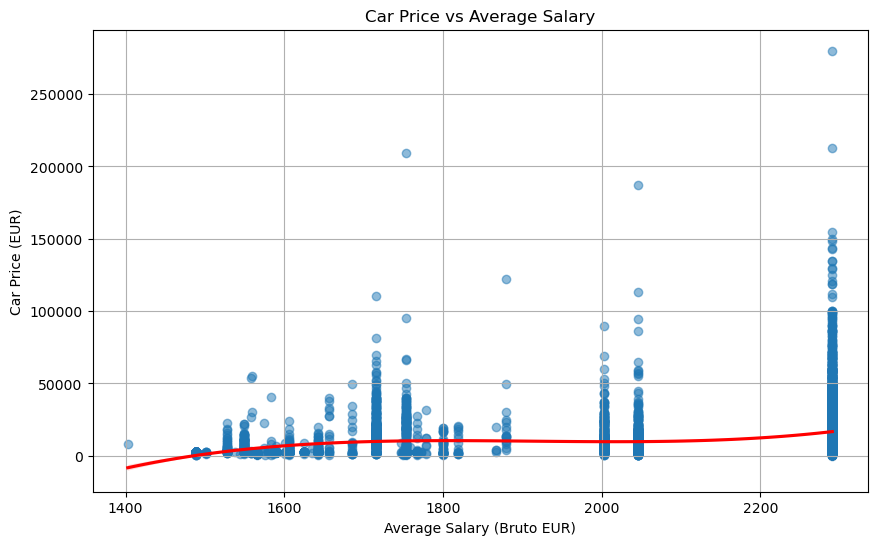

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='bruto_eur_clean', y='price_clean', scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, order=3)
plt.xlabel('Average Salary (Bruto EUR)')
plt.ylabel('Car Price (EUR)')
plt.title('Car Price vs Average Salary')
plt.grid(True)
plt.show()



In [ ]:
#Ar tokia pat priklausomybė egzistuoja atsižvelgiant į automobilių gamintoją (Imti top 5 autogamintojus)
#, kuro rūšį, kėbulo tipą, pasinaudokite seaborn lmplot(). 
#X ašyje vietoj vidutinių atlyginimų pabndykite atvaizduoti Miestų pavadinimus, iš kurių paimti vidutiniai atlyginimai.

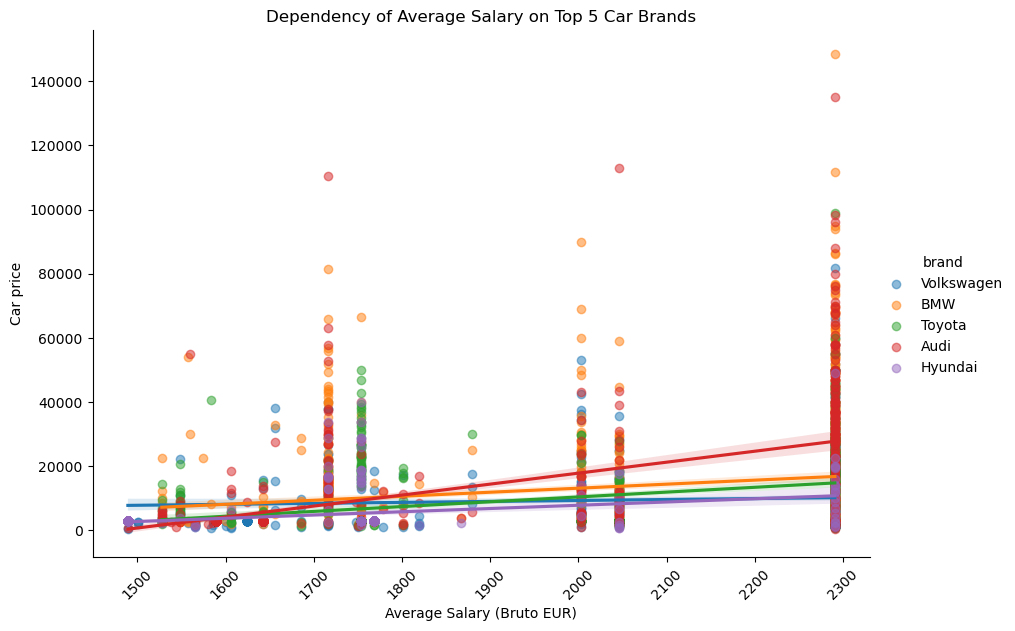

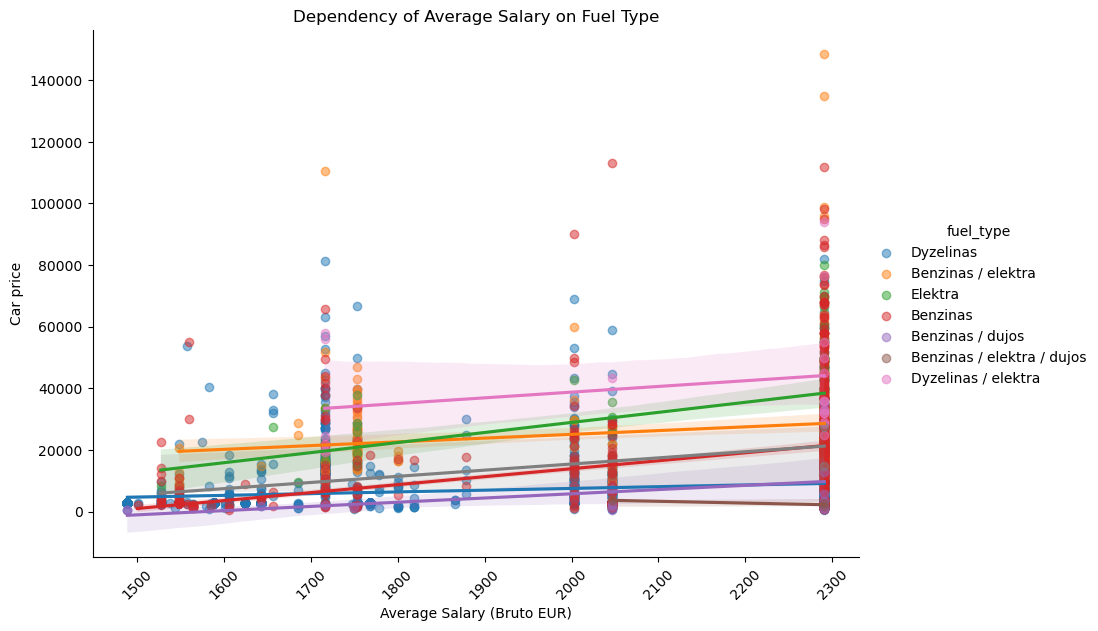

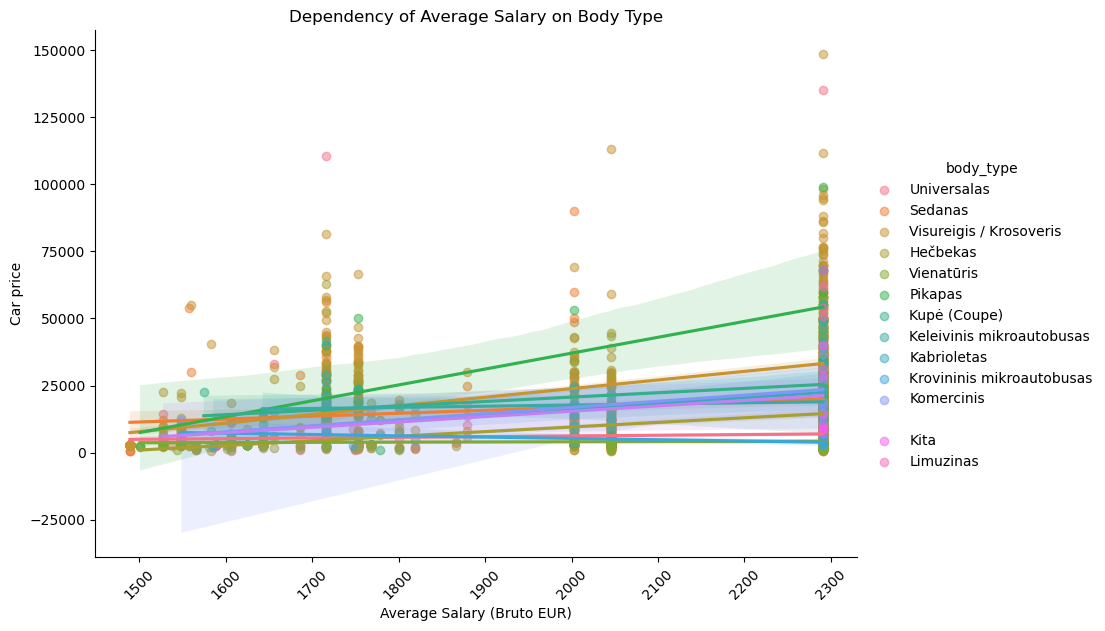

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

top_5_brands = merged_df['brand'].value_counts().head(5).index
filtered_df = merged_df[merged_df['brand'].isin(top_5_brands)]

sns.lmplot(data=filtered_df, x='bruto_eur_clean', y='price_clean', hue='brand', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Dependency of Average Salary on Top 5 Car Brands')
plt.xlabel('Average Salary (Bruto EUR)')
plt.ylabel('Car price')
plt.xticks(rotation=45)
plt.show()


sns.lmplot(data=filtered_df, x='bruto_eur_clean', y='price_clean', hue='fuel_type', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Dependency of Average Salary on Fuel Type')
plt.xlabel('Average Salary (Bruto EUR)')
plt.ylabel('Car price')
plt.xticks(rotation=45)
plt.show()


sns.lmplot(data=filtered_df, x='bruto_eur_clean', y='price_clean', hue='body_type', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Dependency of Average Salary on Body Type')
plt.xlabel('Average Salary (Bruto EUR)')
plt.ylabel('Car price')
plt.xticks(rotation=45)
plt.show()

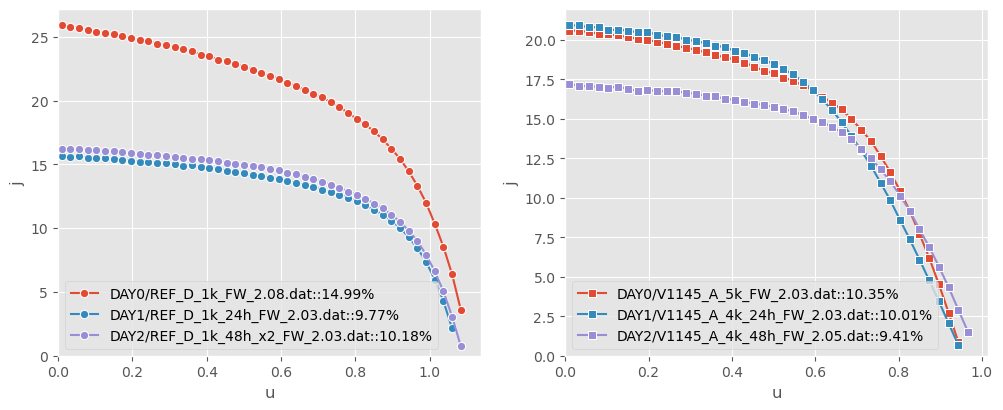

In [ ]:
# 